Installation der benötigten Bibliotheken:
1.  Tensorflow
2.  Numpy
3.  Matplotlib

In [338]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

Laden der Trainings und Testdaten

In [339]:
(train_picture, train_label), (test_picture, test_label) = mnist.load_data()

In [340]:
train_label[0]

np.uint8(5)

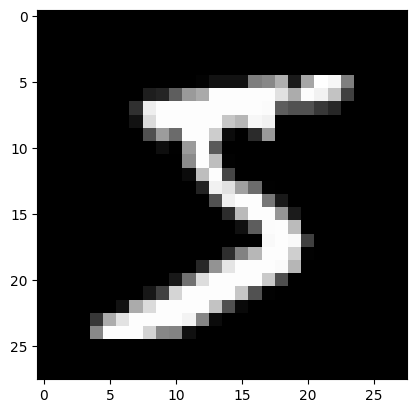

In [341]:
plt.imshow(train_picture[0], cmap="gray")

In [342]:
train_picture[0][15]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

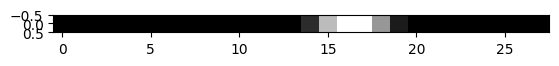

In [343]:
from matplotlib import pyplot as plt
plt.imshow(np.expand_dims(train_picture[0][15], axis=1).reshape(1, -1), cmap="gray")

Normalisierung der Graustufenwerte
1 - 255     ->      0 - 1

In [344]:
train_picture = train_picture / 255
test_picture = test_picture / 255

In [345]:
train_picture.shape[0]

60000

Hinzufügen einer Farbkanal-Dimension

In [346]:
train_picture = train_picture.reshape((train_picture.shape[0], 28, 28, 1))
test_picture = test_picture.reshape((test_picture.shape[0], 28, 28, 1))

Erstellen eines CNN Modells

In [347]:
model = models.Sequential([
   layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
   layers.MaxPooling2D((2, 2)),
   layers.Conv2D(64, (3, 3), activation="relu"),
   layers.Flatten(),
   layers.Dense(64, activation="relu"),
   layers.Dense(10, activation="softmax")
])

In [348]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [349]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,146 (1.97 MB)

 Trainable params: 515,146 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_picture, train_label, epochs=5, validation_data=(test_picture, test_label))

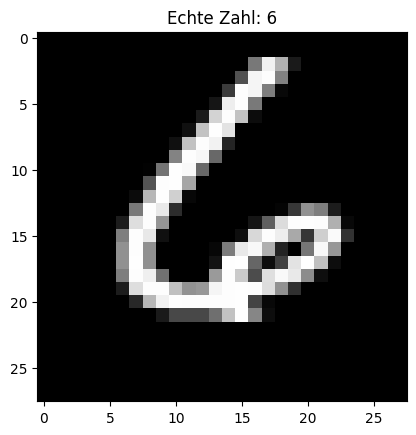

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Vorhergesagte Zahl: 6


In [359]:
random_idx = np.random.randint(0, len(test_picture))
# Wählt einen zufälligen Index aus dem Testdatensatz.
plt.imshow(test_picture[random_idx].reshape(28, 28), cmap='gray')
# Zeigt das ausgewählte Bild in Graustufen an.
plt.title(f"Echte Zahl: {test_label[random_idx]}")
# Fügt dem Bild die tatsächliche Zahl als Titel hinzu.
plt.show()

# Vorhersage
predicted = model.predict(test_picture[random_idx].reshape(1, 28, 28, 1))
# Führt eine Vorhersage auf dem ausgewählten Bild durch. Das Bild muss die Form (1, 28, 28, 1) haben.
print(f"Vorhergesagte Zahl: {np.argmax(predicted)}")